In [1]:
import pandas as pd
df = pd.read_csv('recent-grads.csv')

In [2]:
df.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

<Axes: xlabel='Rank'>

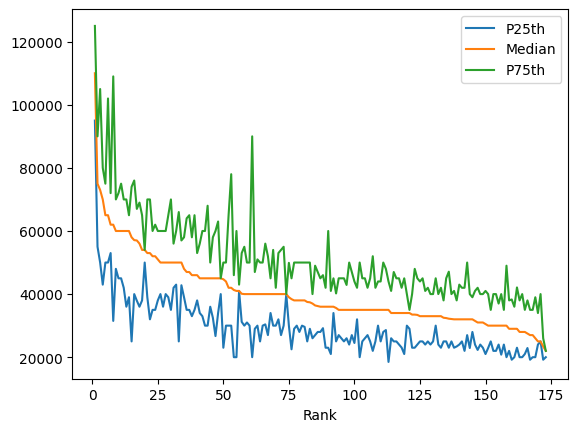

In [4]:
# Visualize the Rank of the program vs the Median Income
df.plot(x = 'Rank', y = ['P25th', 'Median', 'P75th'])  # Compare multiple DS against each other, with respect to the Program Rank

Types of .plot(kind = ?)
+ Area
+ Bar
+ HBar
+ Box
+ HexBin
+ Hist
+ Density
+ Line (default)
+ Pie
+ Scatter

<h3>Surveying the Data</h3>

In [5]:
# Survey just one DS
median_column = df['Median']  # Create a new DS on its own from one of the DS of the DF

In [6]:
type(median_column)  # Show what type of object variable is

pandas.core.series.Series

<Axes: ylabel='Frequency'>

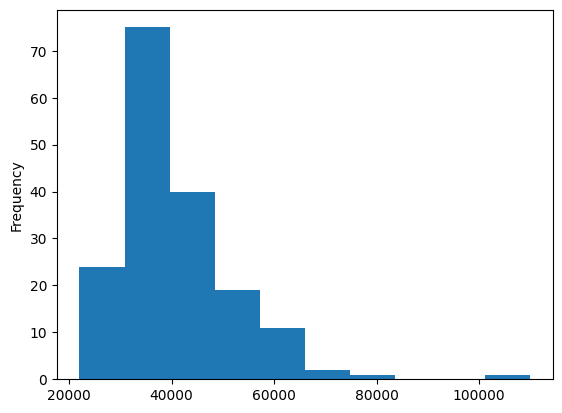

In [7]:
# Create a Histogram with a single DS
median_column.plot(kind = 'hist')

In [8]:
# Find highest-paying workers
top_5 = df.sort_values(by = 'Median', ascending = False).head(5)  # Still the original DF, but just arrange differently

# by: indicates which DS in DF to sort by

<Axes: xlabel='Major'>

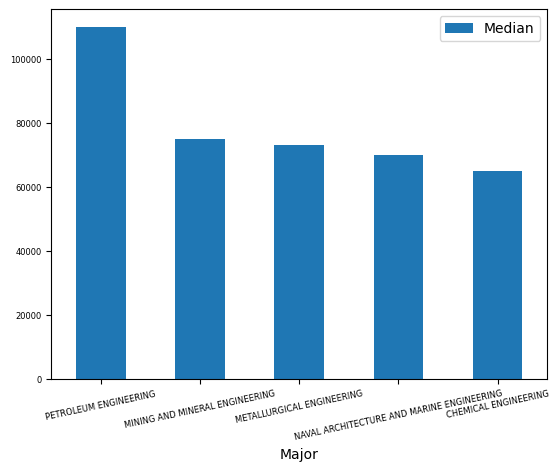

In [9]:
top_5.plot(x = 'Major', y = 'Median', kind = 'bar', rot = 12, fontsize = 6)

# rot: for orientation of x-axis labels

<Axes: xlabel='Major'>

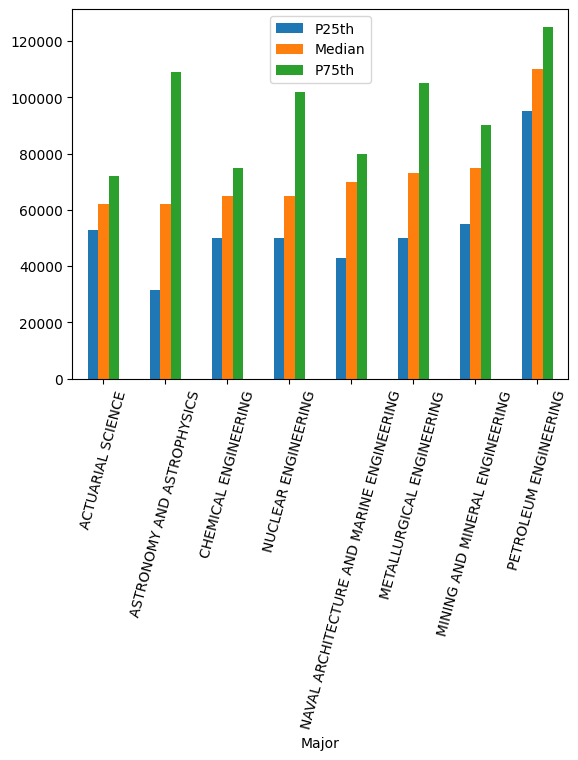

In [10]:
# Exercise: Display all majors with starting salaries over $60K
# x-axis: MAjor
# plot in a bar graph, include the 25th percentile, the median, and the 75th percentile as the y-axis

above_60k = df[df['Median'] > 60000].sort_values('Median')
above_60k.plot(x = 'Major', y = ['P25th', 'Median', 'P75th'], kind = 'bar', rot = 75)

<h3>Checking for Correlation</h3>

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

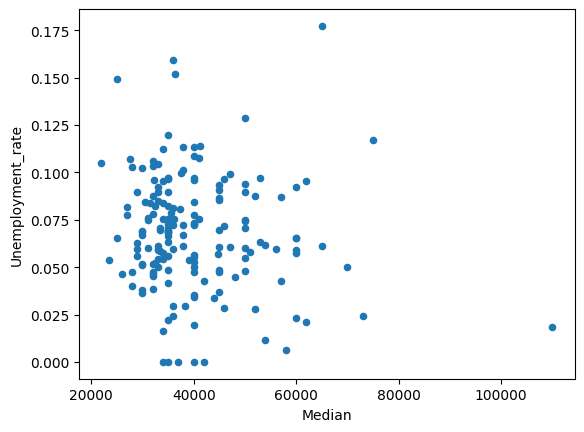

In [11]:
# Q: If you aim for a mojor with higher earnings, does that mean you have a lower chance of unemployment?
df.plot(kind = 'scatter', x = 'Median', y = 'Unemployment_rate')

Therefore, there is a weak correlation

In [12]:
# To check for correlation among all data:
# HIGH correlative value: 0.9 - 1.0

df.corr(numeric_only  = True)  # Consider only int and float values

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Rank,1.000000,0.108429,0.071137,-0.094780,0.174913,0.643781,0.008492,0.070751,0.034725,0.193174,0.020418,0.090078,0.068900,-0.873308,-0.735688,-0.802686,0.052639,0.144689,0.202920
Major_code,0.108429,1.000000,0.196784,0.179299,0.181459,0.259211,0.206580,0.200925,0.199397,0.195184,0.205634,0.223418,0.126603,-0.176072,-0.166864,-0.094556,0.041198,0.232425,0.225294
Total,0.071137,0.196784,1.000000,0.878088,0.944764,0.142999,0.945575,0.996214,0.989339,0.950268,0.981112,0.974768,0.083192,-0.106738,-0.071926,-0.083198,0.800465,0.941247,0.935510
Men,-0.094780,0.179299,0.878088,1.000000,0.672759,-0.112014,0.875176,0.870605,0.893563,0.751592,0.892454,0.869411,0.101502,0.025991,0.038725,0.052393,0.563168,0.851500,0.791336
Women,0.174913,0.181459,0.944764,0.672759,1.000000,0.297832,0.862606,0.944037,0.917681,0.954513,0.905720,0.911694,0.059108,-0.182842,-0.137738,-0.164528,0.851946,0.872132,0.904470
ShareWomen,0.643781,0.259211,0.142999,-0.112014,0.297832,1.000000,0.097496,0.147547,0.120200,0.212290,0.112523,0.121243,0.073205,-0.618690,-0.500199,-0.586932,0.195550,0.137007,0.187850
Sample_size,0.008492,0.206580,0.945575,0.875176,0.862606,0.097496,1.000000,0.964462,0.978396,0.824824,0.985235,0.918059,0.059872,-0.067578,-0.025229,-0.055737,0.701704,0.915464,0.860319
Employed,0.070751,0.200925,0.996214,0.870605,0.944037,0.147547,0.964462,1.000000,0.995838,0.934528,0.991047,0.968900,0.068056,-0.107547,-0.067514,-0.087560,0.797534,0.941326,0.927224
Full_time,0.034725,0.199397,0.989339,0.893563,0.917681,0.120200,0.978396,0.995838,1.000000,0.900877,0.998203,0.960102,0.063349,-0.082258,-0.042957,-0.065073,0.772515,0.933124,0.904852
Part_time,0.193174,0.195184,0.950268,0.751592,0.954513,0.212290,0.824824,0.934528,0.900877,1.000000,0.880855,0.945094,0.108944,-0.190124,-0.153509,-0.158220,0.804987,0.909634,0.951593


<Axes: xlabel='Rank', ylabel='Median'>

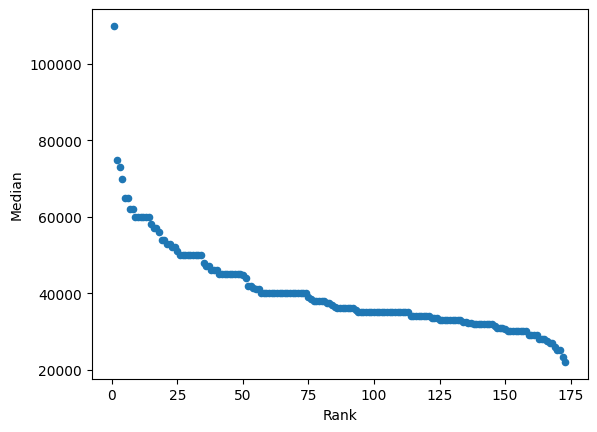

In [13]:
df.plot(kind = 'scatter', x = 'Rank', y = 'Median')

<h3>Analyzing Categorical Data</h3>

In [17]:
# Use unique.() to determine major categories
df['Major_category'].unique()

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Agriculture & Natural Resources',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Humanities & Liberal Arts', 'Psychology & Social Work',
       'Communications & Journalism', 'Interdisciplinary'], dtype=object)

In [25]:
# Find english totals
cat_totals = df.groupby('Major_category')['Total'].sum()
cat_totals

Major_category
Agriculture & Natural Resources          75620.0
Arts                                    357130.0
Biology & Life Science                  453862.0
Business                               1302376.0
Communications & Journalism             392601.0
Computers & Mathematics                 299008.0
Education                               559129.0
Engineering                             537583.0
Health                                  463230.0
Humanities & Liberal Arts               713468.0
Industrial Arts & Consumer Services     229792.0
Interdisciplinary                        12296.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Name: Total, dtype: float64

<Axes: title={'center': 'Major Category vs Graduates'}, ylabel='Major_category'>

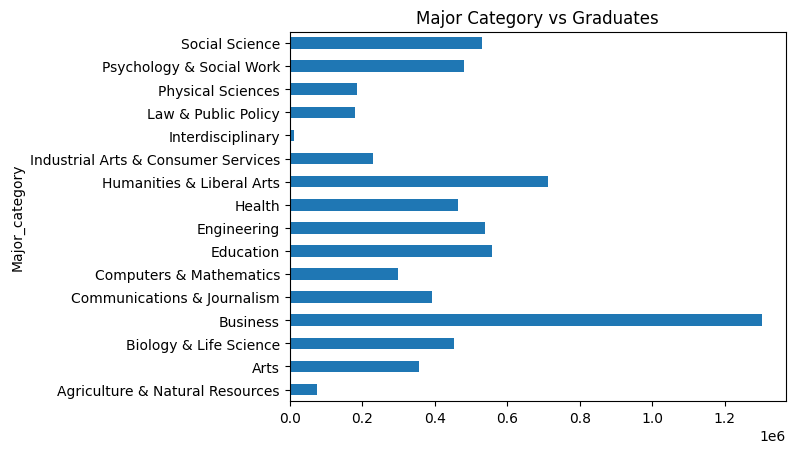

In [29]:
cat_totals.plot(kind = 'barh', title = 'Major Category vs Graduates')

<Axes: ylabel='Total'>

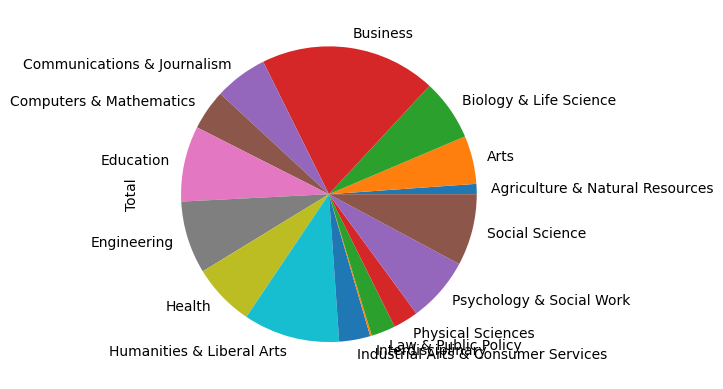

In [30]:
# RATIO -> Terribly formatted categories due to small numbers
cat_totals.plot(kind = 'pie')

In [52]:
# Group categories as an 'Other Category'
## Separate small cats
small_cat_totals = cat_totals[cat_totals < 200000]

In [51]:
# Separate large cats
big_cat_totals = cat_totals[cat_totals >= 200000]

In [41]:
# Merge small cats into one 'Other' DS
small_sums = pd.Series([small_cat_totals.sum()], 
                       index = ['Other'])

<Axes: ylabel='Total'>

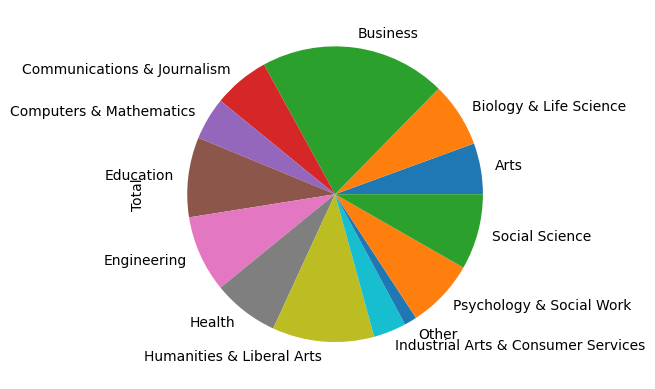

In [53]:
# Append Other DS to big cat DF
big_cat_totals = big_cat_totals.combine_first(small_sums)
big_cat_totals.plot(kind = 'pie')